In [5]:
import pandas as pd
import os
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib inline

In [15]:
df=pd.read_csv('samples/alltrain.csv')

In [16]:
climate={}
for i in os.listdir('./coverages/'):
    with open('coverages/'+i,'r') as f:
        cont=f.readlines()
        temp={}
        for j in cont[:6]:
            temp[j.split()[0]]=float(j.split()[1].strip())
        temp['vals']=[j.strip() for j in cont[6:]]
    #climate[i]=temp
    climate[i.split('.')[0]]=temp


In [17]:
df.rename(index=str,columns={'dd lat':'lat','dd long':'long'},inplace=True)

In [18]:
len(df)

1624

In [19]:
len(df.columns)

3

In [20]:
X=df['long']
Y=df['lat']

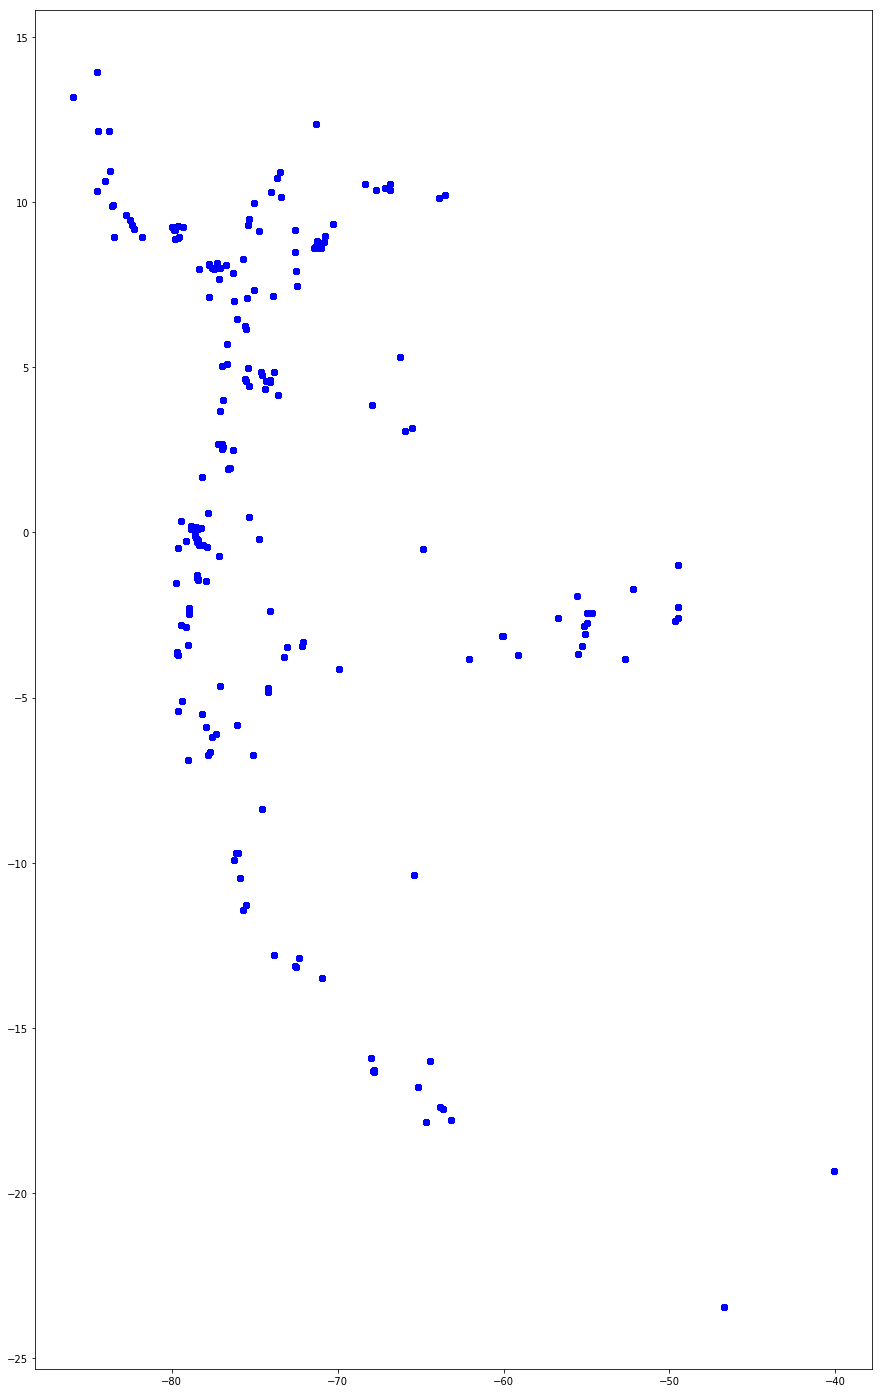

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,25))
plt.plot(X,Y,'bo')

In [22]:
df.head()

,species,long,lat
0,microryzomys_minutus,-64.7000,-17.8500
1,microryzomys_minutus,-67.8333,-16.3333
2,microryzomys_minutus,-67.8833,-16.3000
3,microryzomys_minutus,-67.8000,-16.2667
4,microryzomys_minutus,-67.9833,-15.9000


In [23]:
for count,i in enumerate(climate):
    df[i]=np.zeros(len(df))

In [24]:
for i in df.index:
    g=df.at[i,'long']
    t=df.at[i,'lat']
    for coverage in climate:
        x=int(round((g-climate[coverage]['xllcorner'])/climate[coverage]['cellsize']))
        y=int(round((t-climate[coverage]['yllcorner'])/climate[coverage]['cellsize']))
        if int(climate[coverage]['vals'][y].split(' ')[x]) != int(climate[coverage]['NODATA_value']):
            df.at[i,coverage]=int(climate[coverage]['vals'][y].split(' ')[x])
        else:
            df.at[i,coverage]=np.nan

In [25]:
df

,species,long,lat,pre6190_ann,tmx6190_ann,pre6190_l1,pre6190_l10,pre6190_l7,h_dem,frs6190_ann,pre6190_l4,tmp6190_ann,cld6190_ann,ecoreg,tmn6190_ann,dtr6190_ann,vap6190_ann
0,microryzomys_minutus,-64.7000,-17.850000,49.0,337.0,94.0,41.0,13.0,160.0,0.0,40.0,263.0,62.0,9.0,173.0,110.0,254.0
1,microryzomys_minutus,-67.8333,-16.333300,24.0,228.0,54.0,21.0,3.0,2185.0,66.0,16.0,145.0,56.0,10.0,48.0,131.0,100.0
2,microryzomys_minutus,-67.8833,-16.300000,22.0,214.0,51.0,18.0,3.0,2284.0,83.0,14.0,130.0,57.0,10.0,29.0,135.0,89.0
3,microryzomys_minutus,-67.8000,-16.266700,22.0,226.0,52.0,19.0,3.0,2152.0,64.0,14.0,142.0,56.0,10.0,43.0,134.0,95.0
4,microryzomys_minutus,-67.9833,-15.900000,16.0,193.0,40.0,11.0,2.0,3871.0,117.0,10.0,101.0,57.0,8.0,-11.0,144.0,71.0
5,microryzomys_minutus,-70.9167,-13.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,microryzomys_minutus,-72.5000,-13.166700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,microryzomys_minutus,-72.5667,-13.116700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,microryzomys_minutus,-72.3500,-12.883300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,microryzomys_minutus,-73.8167,-12.783300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,0,'z')

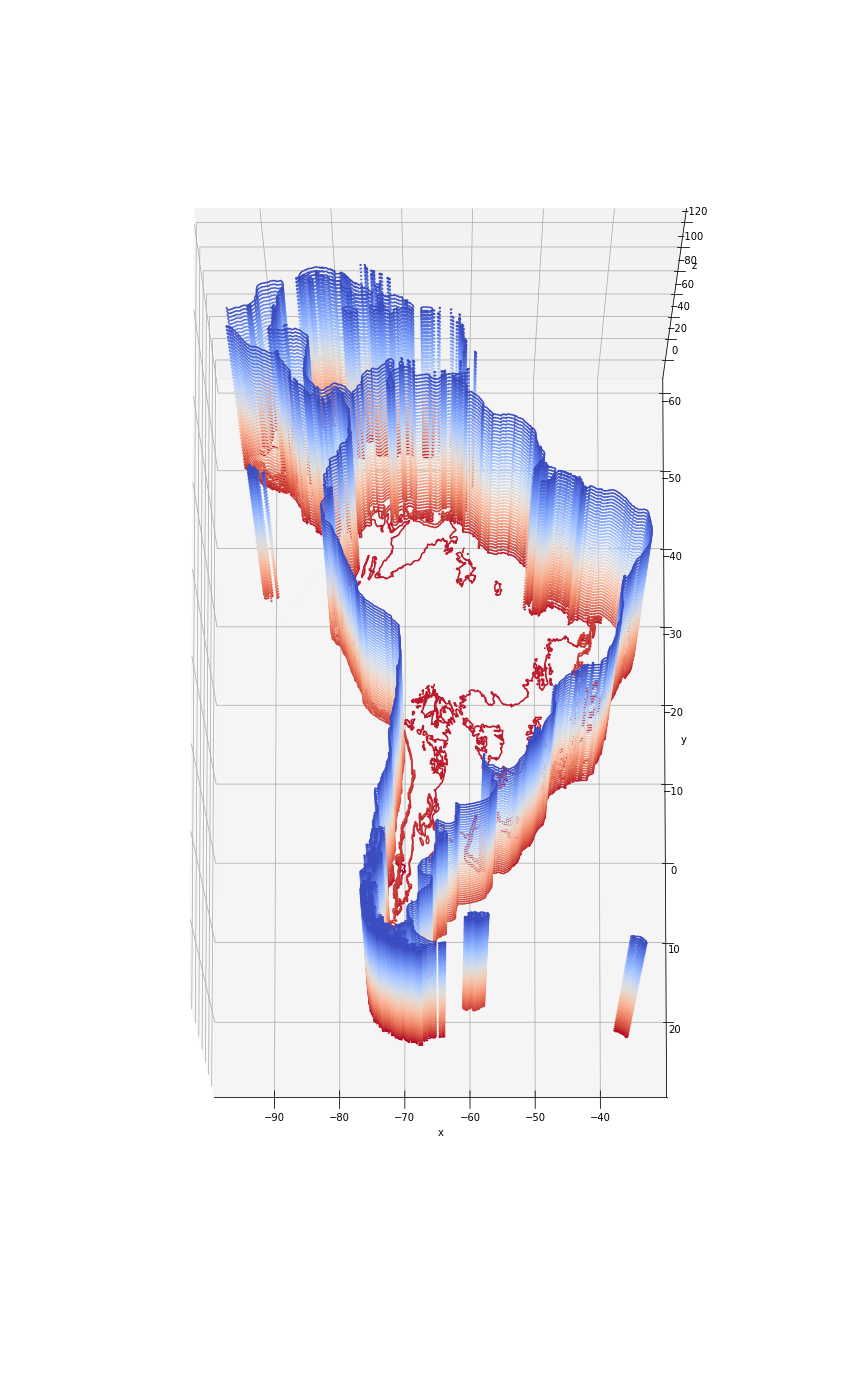

In [28]:


x = np.arange(climate['pre6190_ann']['xllcorner'],climate['pre6190_ann']['xllcorner']+climate['pre6190_ann']['ncols']*climate['pre6190_ann']['cellsize'],climate['pre6190_ann']['cellsize'])
y = np.arange(climate['pre6190_ann']['yllcorner'],climate['pre6190_ann']['yllcorner']+climate['pre6190_ann']['nrows']*climate['pre6190_ann']['cellsize'],climate['pre6190_ann']['cellsize'])

Z=[(i.split()) for i in  climate['ecoreg']['vals']]

X, Y = np.meshgrid(x, y)


fig = plt.figure(figsize=(15,25))
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z, 50, cmap=cm.coolwarm)
ax.view_init(-100,-90)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('ecoreg')

## This dataframe stored as ```features.csv```

### Generating random Negatives 

# Continue checkpoint  
### Train model and save weights simple regression approach

In [30]:
df=pd.read_csv('features.csv')

In [31]:
means={}
for i in df.columns[1:]:
    m=np.mean(df[i])
    df[i]=((df[i]-m)/m)
    means[i]=m

# Continue checkpoint

In [86]:
from keras.models import load_model
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [3]:
df=pd.read_csv('features.csv')

In [4]:
means={}
for i in df.columns[1:]:
    m=np.mean(df[i])
    df[i]=((df[i]-m)/m)
    means[i]=m

In [5]:
means

{'long': -73.22136465517245,
 'lat': 1.0416782967980278,
 'pre6190_ann': 29.311475409836067,
 'tmx6190_ann': 263.8053278688525,
 'pre6190_l1': 31.92827868852459,
 'pre6190_l10': 25.834016393442624,
 'pre6190_l7': 29.204918032786885,
 'h_dem': 757.9398663697104,
 'frs6190_ann': 56.92622950819672,
 'pre6190_l4': 27.850409836065573,
 'tmp6190_ann': 147.18237704918033,
 'cld6190_ann': 51.717213114754095,
 'ecoreg': 7.36734693877551,
 'tmn6190_ann': 41.03483606557377,
 'dtr6190_ann': 119.83401639344262,
 'vap6190_ann': 122.96926229508196}

In [77]:
model=load_model('weights.h5')

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [36]:
climate=[]
for i in os.listdir('./coverages/'):
    with open('coverages/'+i,'r') as f:
        cont=f.readlines()
        nodata=int(cont[5].strip().split(' ')[2])
        temp=[ np.nan if k==str(nodata) else float(k)/(means[i.split('.')[0]])  for j in cont[6:] for k in j.strip().split()   ]
        temp=np.array(temp)
        temp=temp.reshape(1592,1212)
        climate.append(temp)
climate=np.array(climate)

In [37]:
climate.shape

(14, 1592, 1212)

In [38]:
xllcorner=-94.8
yllcorner=-56.05
ncols=1212
nrows=1592
cellsize=0.05
long=[xllcorner+cellsize*i for i in range(ncols)]
long=np.array(long)
lat=[yllcorner+cellsize*i for i in range(nrows)]
lat=np.array(lat)


In [39]:
X=[]
X.append(np.multiply(np.ones((1592,1)),long)/means['long'])
X.append(np.transpose(np.multiply(lat.reshape(1,lat.shape[0]),np.ones((1212,1))))/means['lat'])
for i in climate:
    X.append(i)
X=np.array(X)
X.shape

(16, 1592, 1212)

In [45]:
X=X.transpose(1,2,0)

X=X.reshape(X.shape[0]*X.shape[1],-1)

X=[j for j in X if np.nan not in j]
X=np.array(X)

In [75]:
X.shape

(1929504, 16)

In [79]:
Y=model.predict(X)

In [80]:
Y.shape

(1929504, 1)

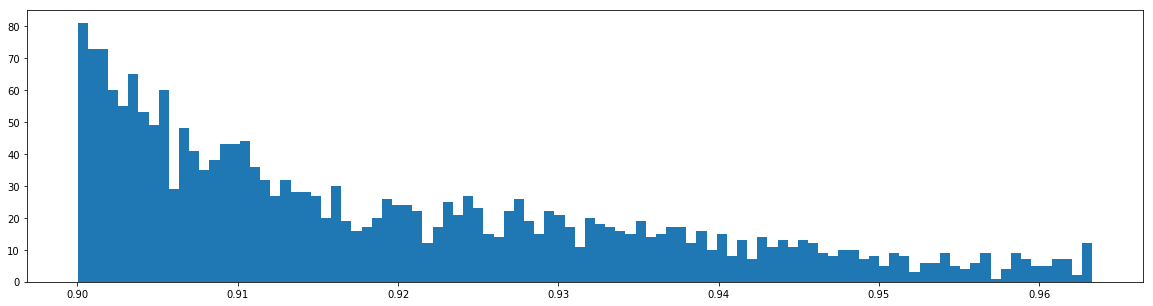

In [133]:
plt.figure(figsize=(20,5))
p=plt.hist(Y[Y>0.9],bins=100)
del p

In [114]:
indices,_=[np.where(Y>.9)][0]

In [124]:
lats[:5]

[1.0707257419909575,
 1.0700428811861165,
 1.0693600203812752,
 1.0686771595764342,
 1.0679942987715927]

In [129]:
longs=np.array([i[0] for i in X[indices]])*means['long']
lats=np.array([i[1] for i in X[indices]])*means['lat']

In [131]:
lats

array([-40.45, -40.45, -40.45, ...,  23.3 ,  23.35,  23.35])

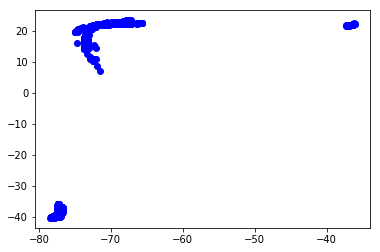

In [132]:
plt.plot(list(longs),list(lats),'bo')